# Linear Regression

## Box Office Prediction

In this section, we will use a simple linear regression model to predict the box office revenue of a movie based on its investment and promotion costs. We will use a small dataset of five movies, each with three features: investment, promotion, and box office. We will use numpy to perform numerical calculations, matplotlib to plot graphs, and sklearn to build and train the linear regression model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model

# Create a numpy array with the data of five movies
x = np.array([[6,1,9], [9,3,12], [12,2,29], [14,3,35], [16,4,59]])

X = x[:,:-1]
Y = x[:, -1]
print('x:', X)
print('y:', Y)

x: [[ 6  1]
 [ 9  3]
 [12  2]
 [14  3]
 [16  4]]
y: [ 9 12 29 35 59]


In [2]:
# Train model

# Create a LinearRegression model object
regr = linear_model.LinearRegression()

# Fit the model to our data
regr.fit(X, Y)

# Print the coefficients (w1 and w2) of the model and the intercept (b) of the model
print('Coefficients (w1, w2) are', regr.coef_)
print('Intercept (b) is: ', regr.intercept_)

Coefficients (w1, w2) are [ 4.94890511 -0.70072993]
Intercept (b) is:  -25.79562043795622


The predicted box office revenue for a movie with an investment of 10 million and a promotion of 3 million is: 21.59124087591241 million
The predicted box office revenue for a movie with an investment of 10 million and a promotion of 3 million is:  [21.59124088] million


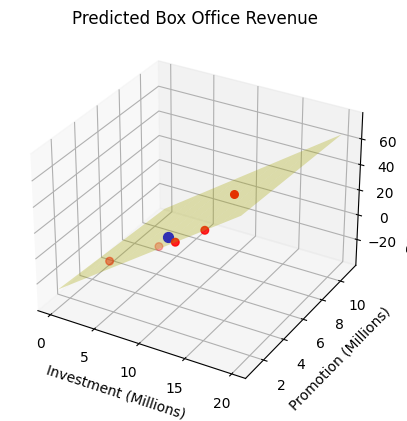

In [3]:
# Model predicting

# Create a numpy array with the new data (investment and promotion)
sample = np.array([[10, 3]])

# Predict the box office revenue using our model
y_predict = regr.predict(sample)
print(f'The predicted box office revenue for a movie with an investment of 10 million and a promotion of 3 million is: {y_predict[0]} million')

#预测
y_predict = regr.predict(np.array([[10,3]]))
print('The predicted box office revenue for a movie with an investment of 10 million and a promotion of 3 million is: ', y_predict, 'million')

# Create a figure with subplot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a grid of values for investment and promotion
x1 = np.linspace(0, 20, 10)
x2 = np.arange(1, 20, 10)
x1, x2 = np.meshgrid(x1, x2)

# Calculate the predicted box office revenue using the model coefficients and intercept
z = regr.coef_[0] * x1 + regr.coef_[1] * x2 + regr.intercept_

ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o', s=30)
ax.scatter(sample[0, 0], sample[0, 1], y_predict, c='b', marker='o', s=50)

# Plot the surface with a yellow color and alpha value of 0.3
ax.plot_surface(x1, x2, z, color='y', alpha=0.3)
ax.set_xlabel('Investment (Millions)')
ax.set_ylabel('Promotion (Millions)')
ax.set_zlabel('Box Office (Millions)')
ax.set_title('Predicted Box Office Revenue')

# Show the figure
plt.show()

## House Pricing Prediction

In this section, we will use a simple linear regression model to predict the house price based on its area and distance from the city center. We will use a small dataset of 15 houses, each with three features: area (in square meters), distance (in kilometers), and price (in million yuan). We will use numpy to perform numerical calculations, matplotlib to plot graphs, and sklearn to build and train the linear regression model.

In [4]:
# Define a function to calculate the cost function for linear regression
def costFunc(theta, x_data, y_data):
    return ((x_data.dot(theta) - y_data) ** 2).sum() / float(2 * len(x_data))

# Define a function to perform the batch gradient descent algorithm
def gradient_descent(theta, x_data, y_data, learning_rate, counter):
    for i in range(counter):
        gradients = x_data.T.dot(x_data.dot(theta) - y_data)
        theta = theta - learning_rate * (1 / len(x_data)) * gradients
    return theta

# Create a numpy array with the data of 15 houses
data = np.array([
    [120, 120, 5],
    [86, 70, 2],
    [150, 160, 1],
    [50, 45, 10],
    [76, 80, 8],
    [113, 100, 18],
    [102, 96, 22],
    [65, 50, 15],
    [92, 88, 5],
    [87, 78, 3],
    [75, 110, 50],
    [62, 80, 40],
    [90, 120, 45],
    [140, 158, 48],
    [145, 160, 35]
])

# Split the features and the target variable
x = data[:, 1:]
y = data[:, 0]

# Add a bias term (intercept) to the feature matrix
x_data = np.c_[np.ones(len(x)), x]

# Set Hyperparameters
theta = np.zeros(x_data.shape[1])

# Set learning rate and counter
learning_rate = 0.00001
counter = 10000

# Perform Gradient Descent
theta = gradient_descent(theta, x_data, y, learning_rate, counter)

# Print Coefficients and Intercept
print('Coefficients (w1, w2) are: ', theta[1:])
print('Intercept (b) is: ', theta[0])

Coefficients (w1, w2) are:  [ 1.05116725 -0.58441742]
Intercept (b) is:  0.2509534018884461


In [5]:
# Predict sample
sample = np.array([[120, 5]])
sample_data = np.c_[np.ones(len(sample)), sample]
y_predict = sample_data.dot(theta)
print(f'The predicted price for a house with an area of 120 square meters and distance from the city center of 5 km is: {y_predict[0]} million yuan')

The predicted price for a house with an area of 120 square meters and distance from the city center of 5 km is: 123.46893599235521 million yuan


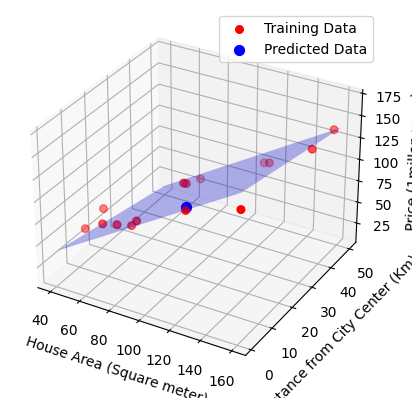

In [6]:
# Visualize the Data and Fitted Plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the training data points
ax.scatter(x[:, 0], x[:, 1], y, color='red', s=30, label='Training Data')

# Plot the training data points
ax.scatter(sample[0, 0], sample[0, 1], y_predict[0], color='blue', s=50, label='Predicted Data')

# Generate points on the fitted plane
x1 = np.linspace(40, 160, 10)
x2 = np.linspace(1, 50, 10)
x1, x2 = np.meshgrid(x1, x2)
z = theta[0] + theta[1] * x1 + theta[2] * x2

# Plot the fitted plane
ax.plot_surface(x1, x2, z, color='blue', alpha=0.3)

ax.set_xlabel('House Area (Square meter)')
ax.set_ylabel('Distance from City Center (Km)')
ax.set_zlabel('Price (1millon yuan)')

plt.legend()
plt.show()